Import Libraries


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Loading the data & checking the columns and info

In [6]:
titanic_data=pd.read_csv('Data/Titanic-Train-Data.csv')

In [7]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling Null Values/Missing Values

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling Missing Values 

# Imputation on Embarked and Age columns

In [12]:
age_mean=titanic_data['Age'].mean()
age_mean

29.69911764705882

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [14]:
embarked_mode=titanic_data['Embarked'].mode()
embarked_mode

0    S
dtype: object

In [15]:
embarked_mode[0]

'S'

In [16]:
titanic_data['Embarked'].fillna(embarked_mode[0],inplace=True)

In [17]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Title Extraction from Name Column

In [19]:
titanic_data['Initial']=0
for i in titanic_data:
    titanic_data['Initial']=titanic_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [20]:
 titanic_data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [21]:
pd.crosstab(titanic_data.Initial,titanic_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
titanic_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
titanic_data.groupby('Initial')['Age'].mean()

Initial
Master     7.086662
Miss      23.377249
Mr        32.049894
Mrs       35.140827
Other     45.888889
Name: Age, dtype: float64

In [24]:
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Initial=='Mr'),'Age']=33
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Initial=='Mrs'),'Age']=36
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Initial=='Master'),'Age']=5
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Initial=='Miss'),'Age']=22
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Initial=='Other'),'Age']=46

In [25]:
titanic_data.Age.isnull().any()

False

# FamilySize

In [26]:
titanic_data["Fsize"] = titanic_data["SibSp"] + titanic_data["Parch"] + 1

In [27]:
titanic_data["family_size"] = [1 if i < 5 else 0 for i in titanic_data["Fsize"]]

In [28]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Fsize,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,1,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,Mr,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs,3,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs,2,1


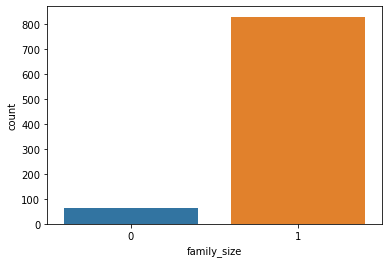

In [29]:
sns.countplot(x = "family_size", data = titanic_data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


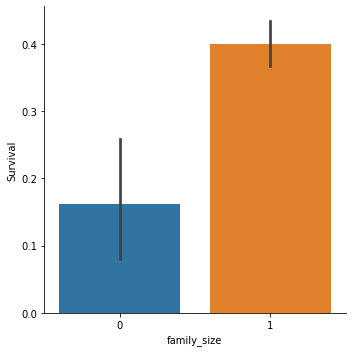

In [30]:
g = sns.factorplot(x = "family_size", y = "Survived", data = titanic_data, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [31]:
titanic_data = pd.get_dummies(titanic_data, columns= ["family_size"])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Fsize,family_size_0,family_size_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,1


# Ticket First letters Extraction

In [32]:
titanic_data["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [33]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [34]:
tickets = []
for i in list(titanic_data.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
titanic_data["Ticket"] = tickets

In [35]:
titanic_data["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [37]:
titanic_data = pd.get_dummies(titanic_data, columns= ["Ticket"], prefix = "T")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,NaN,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,...,0,0,0,0,0,0,0,0,0,1


In [56]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Fsize',
       'family_size_0', 'family_size_1', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x'],
      dtype='object')

# Sex Vs. Age Vs Pclass

<AxesSubplot:xlabel='Sex', ylabel='Age'>

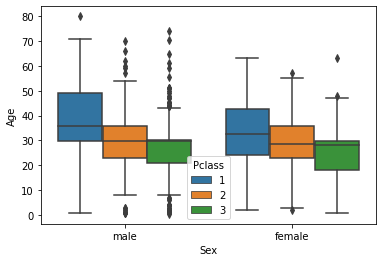

In [47]:
sns.boxplot(x="Sex", y="Age", hue="Pclass", data=titanic_data)

# Survived Vs Age Vs Pclass

<AxesSubplot:xlabel='Survived', ylabel='Age'>

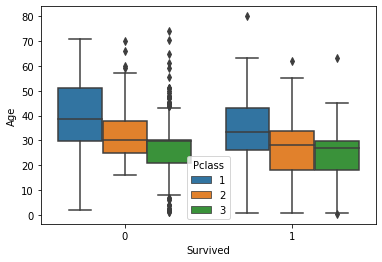

In [48]:
sns.boxplot(x="Survived", y="Age", hue="Pclass", data=titanic_data)

# Pclass -- Survived

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


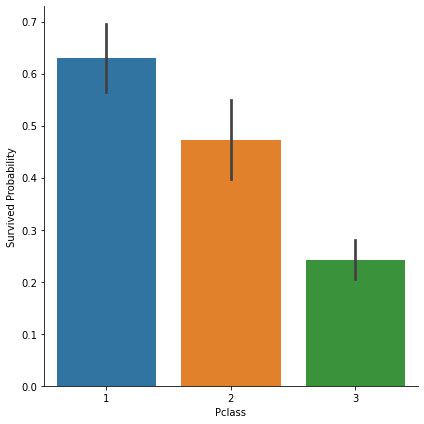

In [49]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = titanic_data, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

# Age -- Survived

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


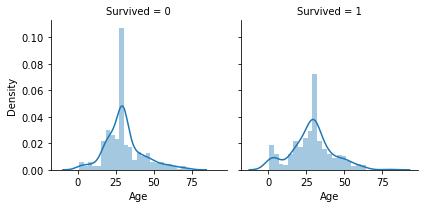

In [50]:
g = sns.FacetGrid(titanic_data, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

# Pclass -- Survived -- Age

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


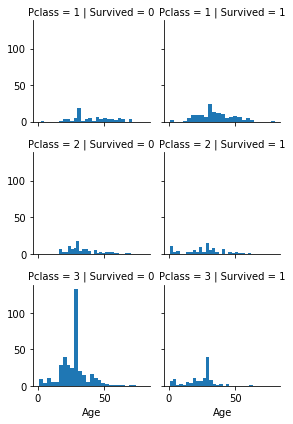

In [51]:
g = sns.FacetGrid(titanic_data, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

# Age Vs Pclass

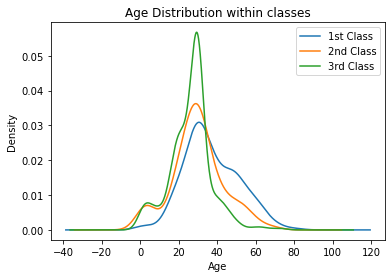

In [52]:
titanic_data.Age[titanic_data.Pclass == 1].plot(kind='kde')    
titanic_data.Age[titanic_data.Pclass == 2].plot(kind='kde')
titanic_data.Age[titanic_data.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# Embarked -- Sex -- Fare -- Survived

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


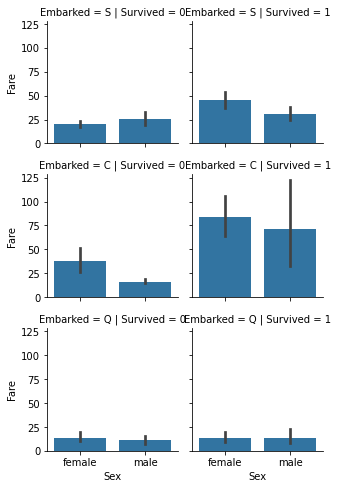

In [57]:
g = sns.FacetGrid(titanic_data, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

# Pclass Categorical column

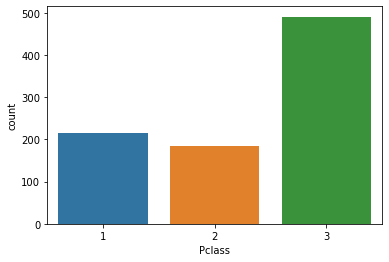

In [54]:
sns.countplot(x = "Pclass", data = titanic_data)
plt.show()

# Encoding SEX Column

In [58]:
titanic_data = pd.get_dummies(titanic_data, columns= ["Sex"])
titanic_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,...,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,NaN,S,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,C85,C,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,NaN,S,...,0,0,0,1,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,C123,S,...,0,0,0,0,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,NaN,S,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,NaN,S,...,0,0,0,0,0,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,B42,S,...,0,0,0,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,NaN,S,...,0,0,0,0,0,1,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,C148,C,...,0,0,0,0,0,0,0,1,0,1


In [59]:
titanic_data['Sex']=titanic_data['Sex_male']

In [60]:
titanic_data.drop(labels=['Sex_male','Sex_female'],axis=1,inplace=True)

In [61]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Initial', 'Fsize', 'family_size_0',
       'family_size_1', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON',
       'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Sex'],
      dtype='object')

# Dropping PassngerId & Cabin Columns

In [62]:
titanic_data.drop(labels = ["PassengerId","Cabin"], axis = 1, inplace = True)

In [63]:
titanic_data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Initial,Fsize,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Sex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,Mr,2,...,0,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,Mrs,2,...,0,0,0,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,Miss,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,Mrs,2,...,0,0,0,0,0,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,Mr,1,...,0,0,0,0,0,0,0,0,1,1


# Visualization

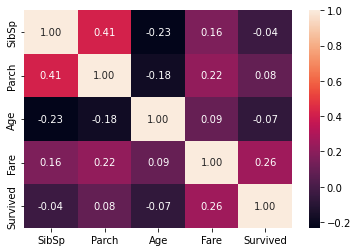

In [64]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(titanic_data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


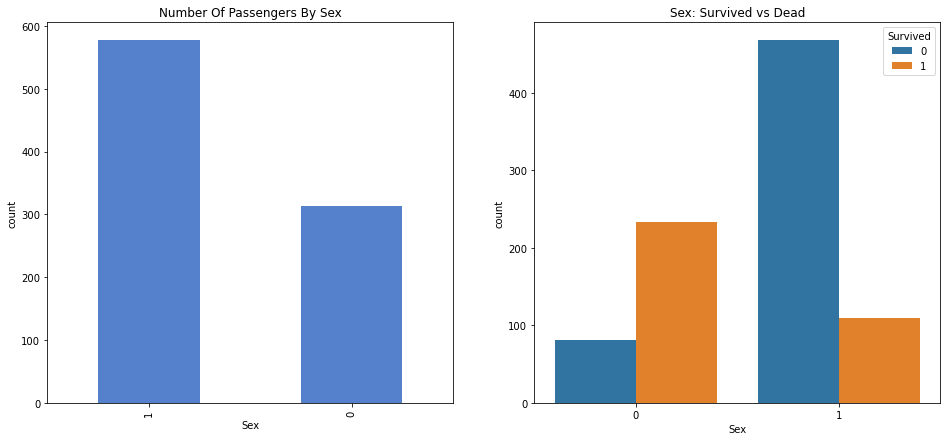

In [65]:
fig ,ax=plt.subplots(1,2,figsize=(16,7))
titanic_data['Sex'].value_counts().plot.bar(color="#5580cc",ax=ax[0], xlabel="Sex")
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('count')
sns.countplot('Sex', hue='Survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# countplot of survived vs not  survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

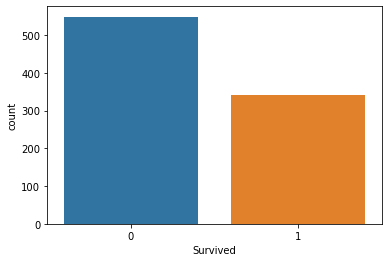

In [66]:
sns.countplot(x='Survived',data=titanic_data) 

# Male Vs Female survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

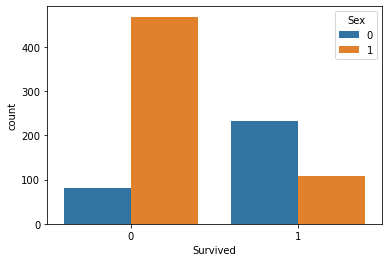

In [67]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')  

# find the distribution for the age column

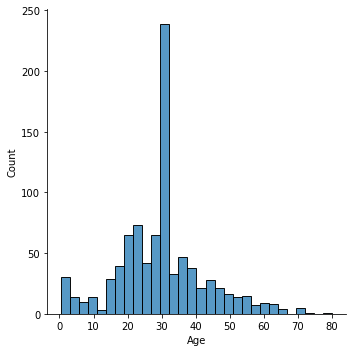

In [68]:
p=sns.displot(x='Age',data=titanic_data)
p.set( xlabel = "Age", ylabel = "Count")

# Sex Vs. Age

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


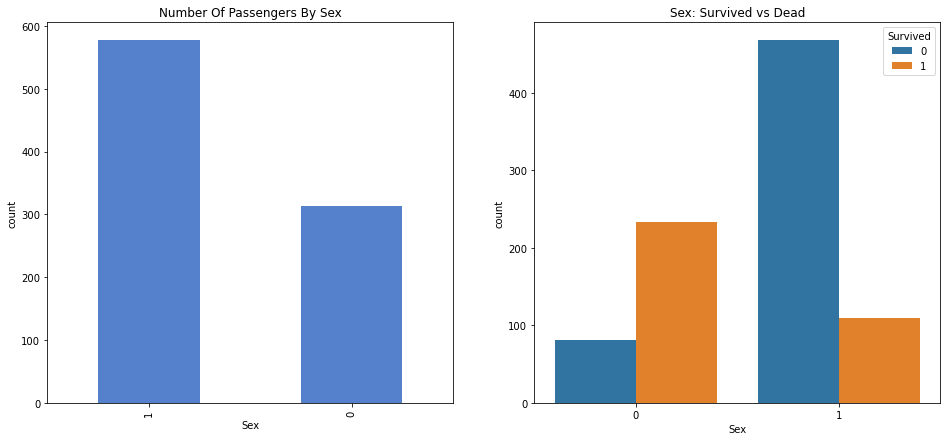

In [69]:
fig ,ax=plt.subplots(1,2,figsize=(16,7))
titanic_data['Sex'].value_counts().plot.bar(color="#5580cc",ax=ax[0], xlabel="Sex")
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('count')
sns.countplot('Sex', hue='Survived', data=titanic_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# Violin Plot of  Sex Vs Age Vs Pclass

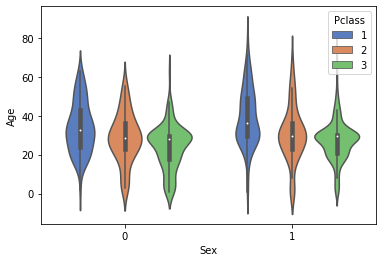

In [77]:

ax = sns.violinplot(x=titanic_data['Sex'], y=titanic_data['Age'], hue=titanic_data['Pclass'],
                    data=titanic_data, palette="muted")

Text(0.5, 1.0, 'Distribution of age among Alive people')

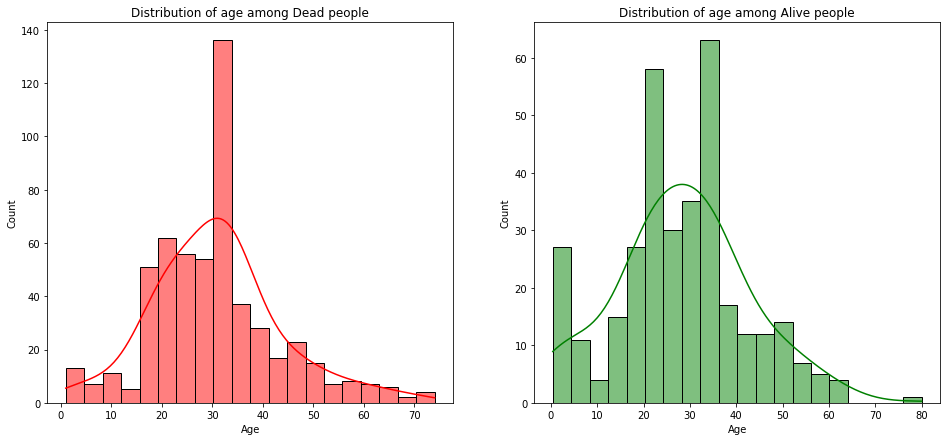

In [208]:
fig,ax = plt.subplots(1,2,figsize=(16,7))

# Dead
sns.histplot(data=titanic_data[titanic_data['Survived']==0],
             x='Age',bins=20,
             kde=True,
             kde_kws=dict(bw_adjust=1.5),
             legend=True,
             color='red',
             ax=ax[0])
ax[0].set_title("Distribution of age among Dead people")

# Alive
sns.histplot(data=titanic_data[titanic_data['Survived']==1],
             x='Age',bins=20,
             kde=True,
             kde_kws=dict(bw_adjust=1.5),
             legend=True,
             color='green',
             ax=ax[1])
ax[1].set_title("Distribution of age among Alive people")

Text(0.5, 1.0, 'Female passengers')

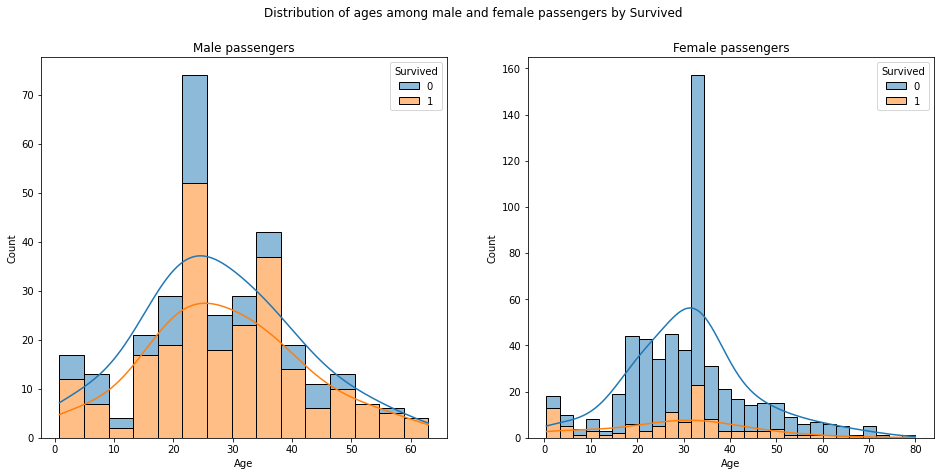

In [209]:
fig ,ax=plt.subplots(1,2,figsize=(16,7))
plt.suptitle("Distribution of ages among male and female passengers by Survived")

sns.histplot(x='Age', hue='Survived',
             data=titanic_data[titanic_data["Sex"]==0],
             multiple='stack',
             kde=True,
             kde_kws = dict(bw_adjust=1.5),
             ax=ax[0])

ax[0].set_title("Male passengers")

sns.histplot(x='Age', hue='Survived',
             data=titanic_data[titanic_data["Sex"]==1],
             multiple='stack',
             kde=True,
             kde_kws = dict(bw_adjust=1.5),
             ax=ax[1])

ax[1].set_title("Female passengers")

In [80]:
titanic_data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Initial,Fsize,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Sex
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,Mr,2,...,0,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,Mrs,2,...,0,0,0,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,Miss,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,Mrs,2,...,0,0,0,0,0,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,Mr,1,...,0,0,0,0,0,0,0,0,1,1


In [79]:

titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Initial', 'Fsize', 'family_size_0', 'family_size_1',
       'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH',
       'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP',
       'T_WC', 'T_WEP', 'T_x', 'Sex'],
      dtype='object')

# Encoding Embarked Column

In [81]:
titanic_data['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [82]:
titanic_data['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)


In [86]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Initial', 'Fsize', 'family_size_0', 'family_size_1',
       'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH',
       'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP',
       'T_WC', 'T_WEP', 'T_x', 'Sex'],
      dtype='object')

In [89]:
EDA_Titanic=titanic_data[['Survived', 'Pclass','Sex','Initial', 'Name', 'Age', 'SibSp', 'Parch','Embarked', 'Fsize']]

In [91]:
EDA_Titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fsize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,0.361392,1.904602
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000,11.000000


# Pickle the EDA

In [92]:

with open('EDA_Titanic.pkl', 'wb') as f:
    pickle.dump(titanic_data, f)

# Model Building

In [93]:
#Seperate Dependent and Independent variables

In [94]:
EDAFile=pickle.load(open('EDA_Titanic.pkl','rb'))

In [105]:
x=EDAFile[['Pclass','Sex','Age', 'SibSp', 'Parch','Embarked', 'Fsize']]
y=EDAFile[['Survived']]

In [106]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fsize
0,3,1,22.000000,1,0,0,2
1,1,0,38.000000,1,0,1,2
2,3,0,26.000000,0,0,0,1
3,1,0,35.000000,1,0,0,2
4,3,1,35.000000,0,0,0,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,0,1
887,1,0,19.000000,0,0,0,1
888,3,0,29.699118,1,2,0,4
889,1,1,26.000000,0,0,1,1


In [107]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# MODELLING



#import train test split method

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [112]:
lr=LogisticRegression()

In [113]:
lr.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [115]:
predict=lr.predict(x_test)  # Predictions
predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

# TESTING MODEL

In [116]:
from sklearn.metrics import confusion_matrix
#import classification report
from sklearn.metrics import classification_report

In [117]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,129,27
Actual Yes,26,86


In [118]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       156
           1       0.76      0.77      0.76       112

    accuracy                           0.80       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.80      0.80      0.80       268



In [120]:
with open('Train_Test.pkl', 'wb') as f:
    pickle.dump(titanic_data, f)